# Feature Engineering

Feature Engineering is applied to a dataset to obtain more effective models with the domain knowledge guide.

Feature Engineering can be proceduralized as follows;

1. <a href='#feature_selection_section'><b>Feature Selection</b></a>
2. <a href='#encoding_section'><b>Encoding</b></a>
3. <a href='#feature_scaling_section'><b>Feature Scaling</b></a><br>
4. <a href='#storing_section'><b>Storing The Data</b></a><br>

---

## Data Read

In [2]:
# Import necessary libraries for data obtaining
import pandas as pd

In [3]:
# Read the data into a data frame
cleaned_data = pd.read_csv('Google_Stock_Price_Dataset.csv')

In [4]:
cleaned_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [5]:
# Splittng the predictors(X) and target(Y) features into two different data frames
cleaned_data_X =  cleaned_data[['Open', 'High', 'Low', 'Adj_Close', 'Volume']]
cleaned_data_Y = cleaned_data[['Close']]

In [6]:
cleaned_data.shape

(4856, 7)

In [7]:
cleaned_data_X.shape

(4856, 5)

In [8]:
cleaned_data_Y.shape

(4856, 1)

---

<a id='feature_selection_section'></a>
## 1. Feature Selection

In this section, features, which are going to be used in the models, are selected by considering Data Exploration step results and domain knowledge.

In [ ]:
# All the features will be usedexcept 'Date'

<a id='encoding_section'></a>
## 2. Encoding

In [ ]:
# There is no categorical feature that needs to be encoded

---

<a id='feature_scaling_section'></a>
## 3. Feature Scaling

In [9]:
# Necessary library
import seaborn as sns

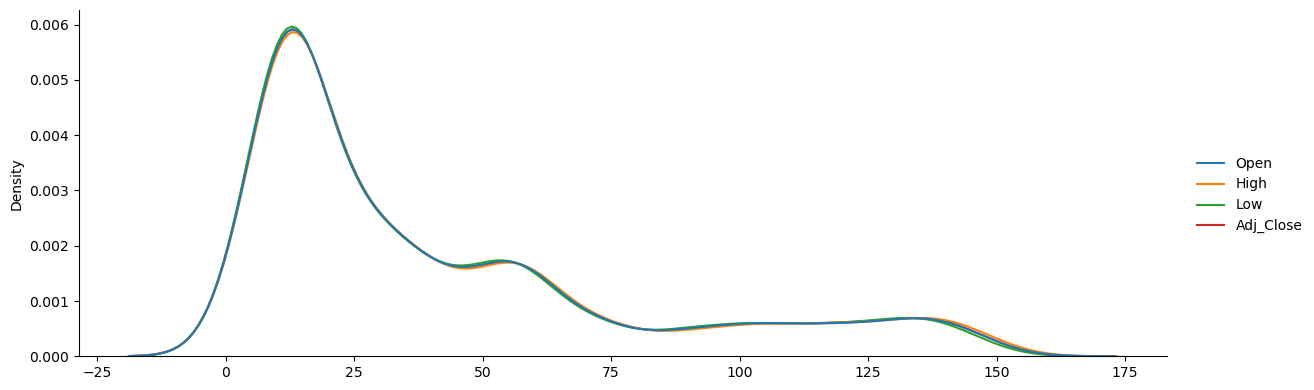

In [18]:
# distributios of the Open, High, Low, Adj_Close features without scaling operation
sns.displot(cleaned_data_X.iloc[:,0:4], kind='kde', aspect=3, height=4)

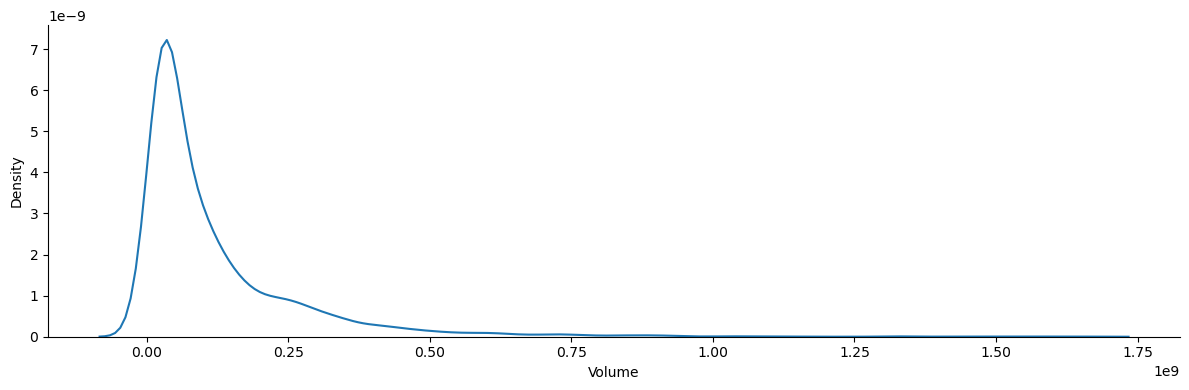

In [19]:
# distributios of the Volume feature without scaling operation
sns.displot(cleaned_data_X['Volume'], kind='kde', aspect=3, height=4)

---

### Predictor Scaling

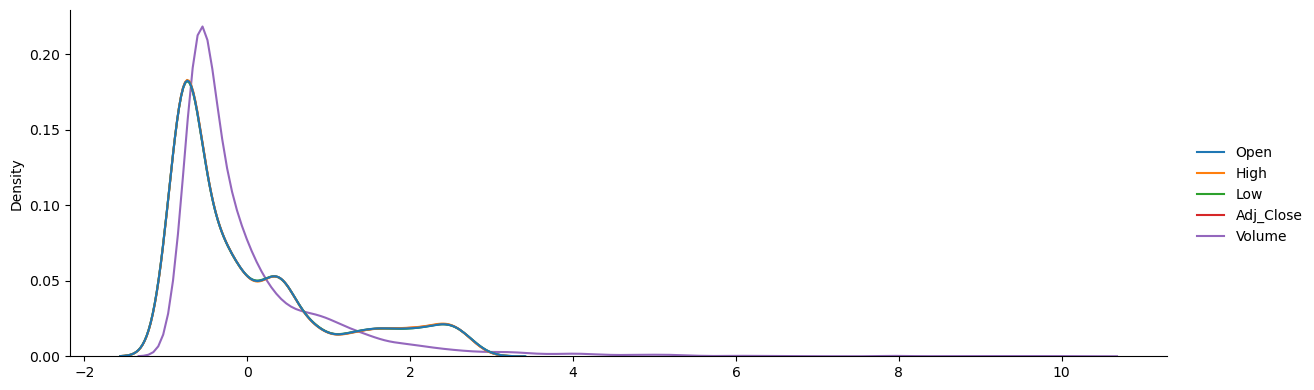

In [13]:
# Predictor Standardization
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardized = cleaned_data_X.copy(deep=True)
standardized[:] = standardizer.fit_transform(standardized[:])
standardized = pd.DataFrame(standardized)
sns.displot(standardized, kind='kde', aspect=3, height=4)

---

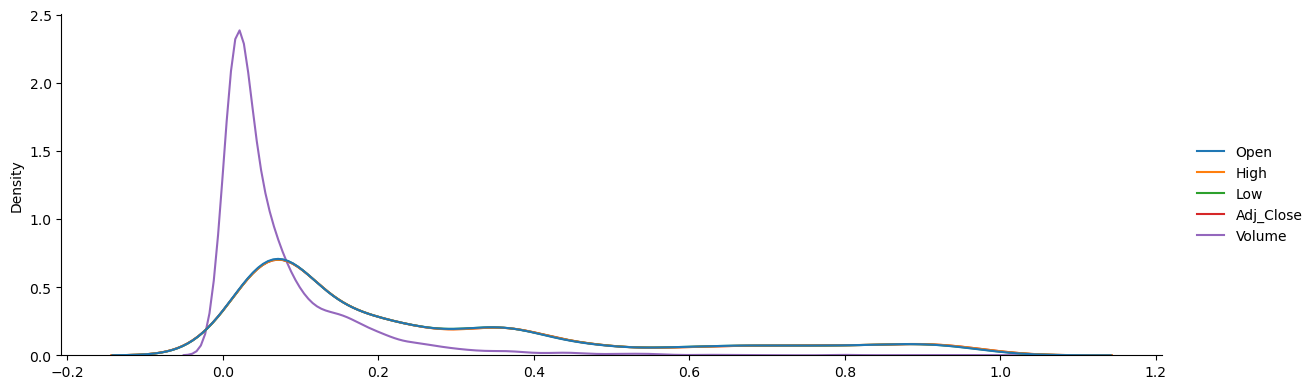

In [14]:
# Predictor Normalization
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
normalized = cleaned_data_X.copy(deep=True)
normalized[normalized.columns[:]] = normalizer.fit_transform(normalized[:])
normalized = pd.DataFrame(normalized)
sns.displot(normalized, kind='kde', aspect=3, height=4)

---

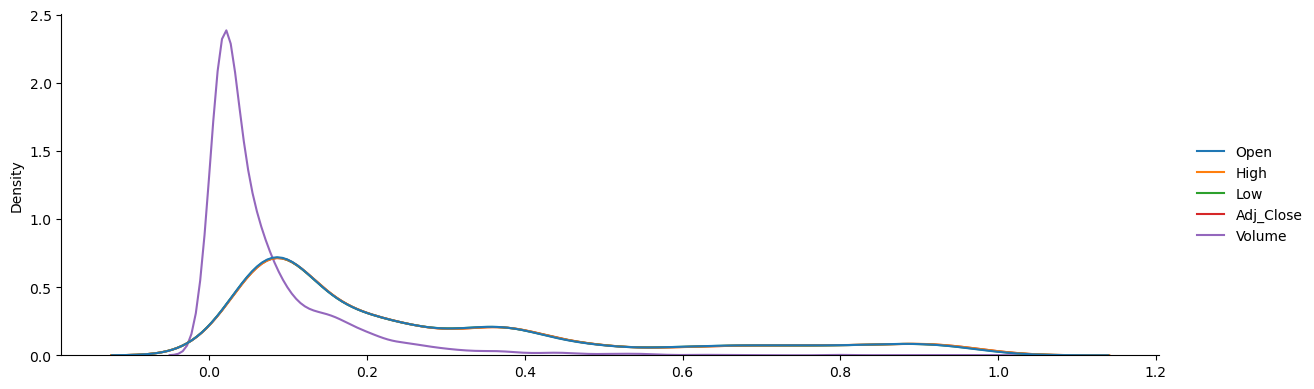

In [20]:
# Predictor Maximum Absolute Scaling
from sklearn.preprocessing import MaxAbsScaler
max_abs_scaler = MaxAbsScaler()
max_abs_scaled = cleaned_data_X.copy(deep=True)
max_abs_scaled[max_abs_scaled.columns[:]] = max_abs_scaler.fit_transform(max_abs_scaled[:])
max_abs_scaled = pd.DataFrame(max_abs_scaled)
sns.displot(max_abs_scaled, kind='kde', aspect=3, height=4)

---

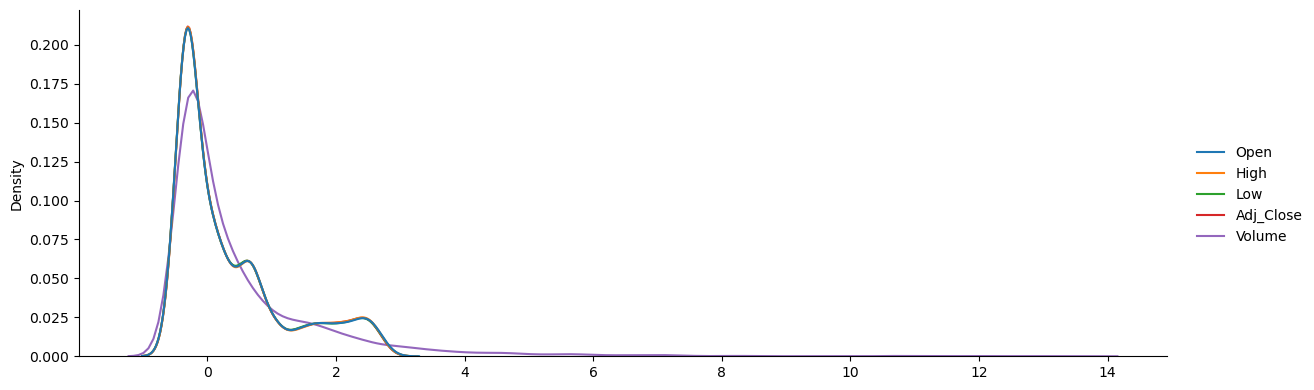

In [21]:
# Predictor Robust Scaling
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
robust_scaled = cleaned_data_X.copy(deep=True)
robust_scaled[robust_scaled.columns[:]] = robust_scaler.fit_transform(robust_scaled[:])
robust_scaled = pd.DataFrame(robust_scaled)
sns.displot(robust_scaled, kind='kde', aspect=3, height=4)

---

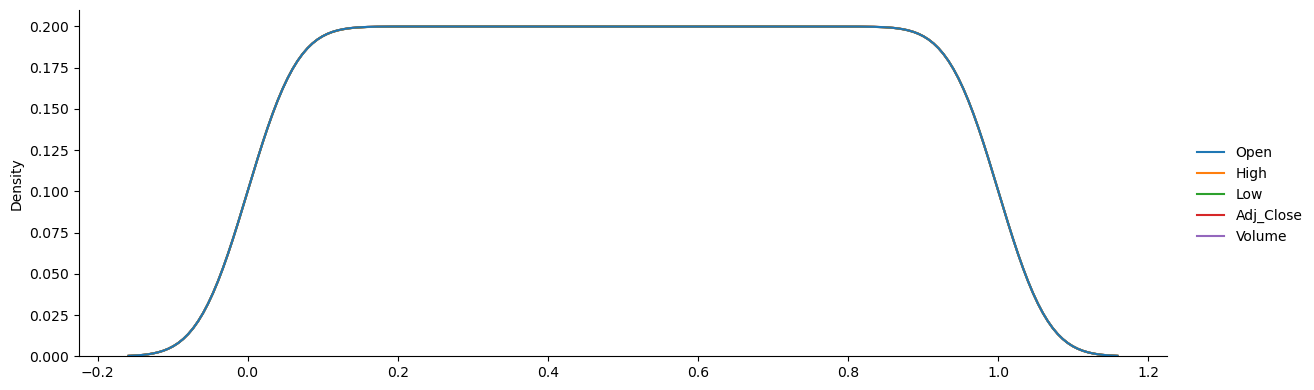

In [22]:
# Predictor Quantile Transformer Scaling
from sklearn.preprocessing import QuantileTransformer
quantile_transformer = QuantileTransformer()
quantile_transformed = cleaned_data_X.copy(deep=True)
quantile_transformed[quantile_transformed.columns[:]] = quantile_transformer.fit_transform(quantile_transformed[:])
quantile_transformed = pd.DataFrame(quantile_transformed)
sns.displot(quantile_transformed, kind='kde', aspect=3, height=4)

---

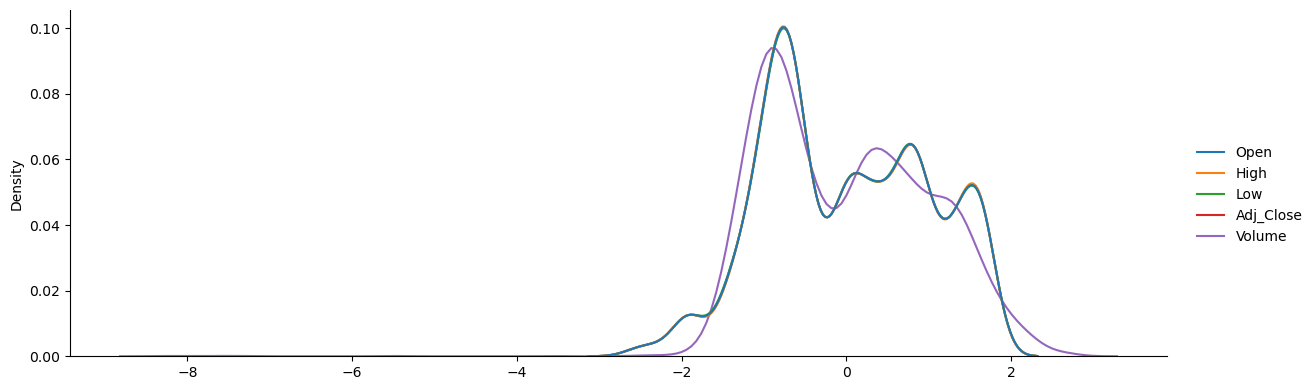

In [23]:
# Predictor Power Transformer Scaling (with Yeo-Johnson Transform)
from sklearn.preprocessing import power_transform
powered = cleaned_data_X.copy(deep=True)
powered[powered.columns[:]] = power_transform(powered, method='yeo-johnson')
powered = pd.DataFrame(powered)
sns.displot(powered, kind='kde', aspect=3, height=4)

In the predictor scaling, Normalization scaling performed better than others. Because, it as more normal distriburtion that is desired distribution in the regression projets. Thus, Normalization Scaling will be used in the model predictions for predictors.

---

### Target Scaling

In [24]:
# Necessary library
import numpy as np

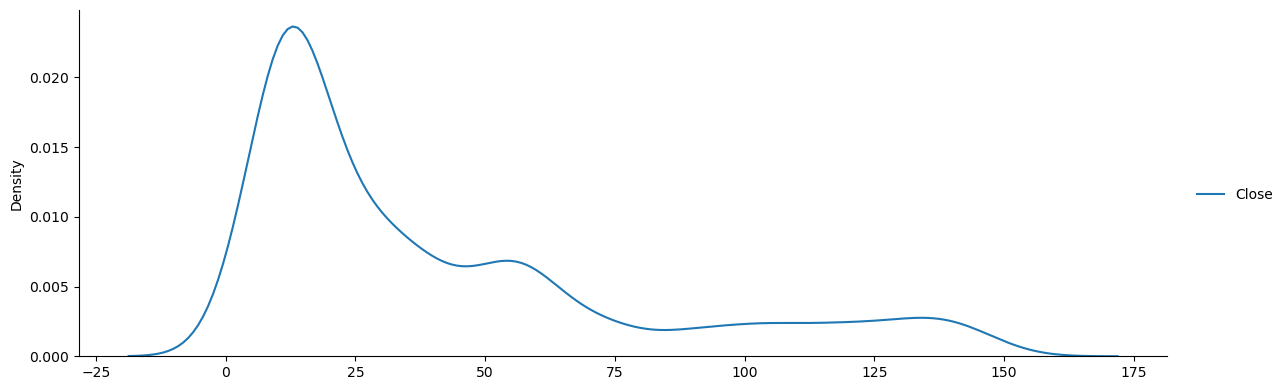

In [27]:
# distributios of the Close feature without scaling operation
sns.displot(cleaned_data_Y, kind='kde', aspect=3, height=4)

---

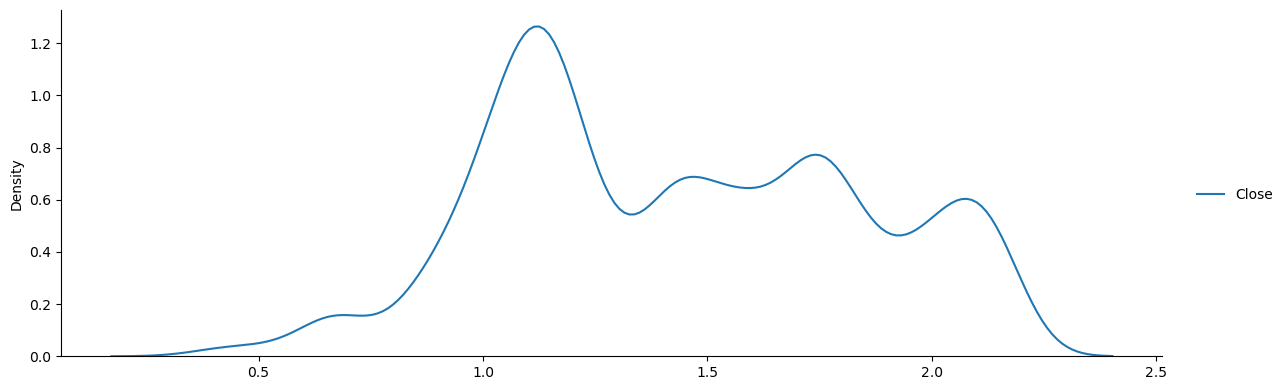

In [26]:
# Base-10 Logarithmic Target Scaling
base_10_log_scaled_y = np.log10(cleaned_data_Y)
sns.displot(base_10_log_scaled_y, kind='kde', aspect=3, height=4)

---

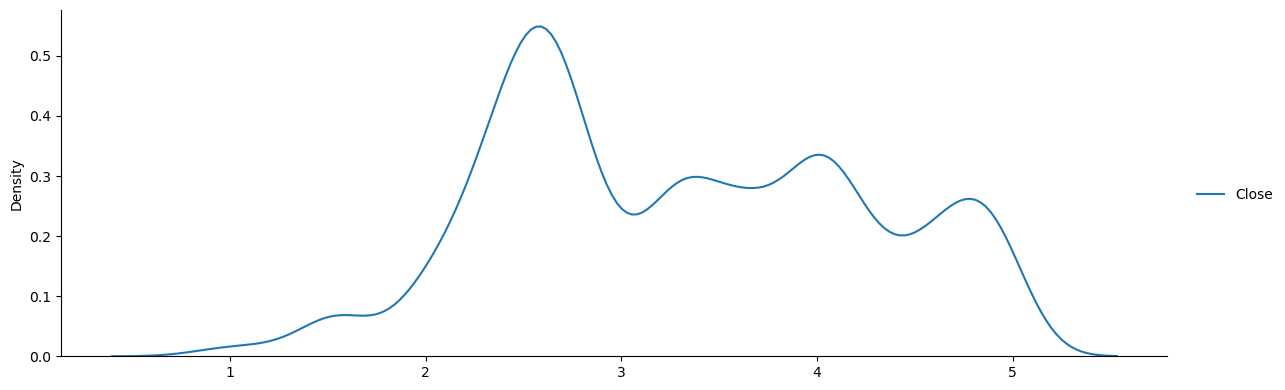

In [29]:
# Base-e Logarithmic Target Scaling
base_e_log_scaled_y = np.log(cleaned_data_Y)
sns.displot(base_e_log_scaled_y, kind='kde', aspect=3, height=4)

---

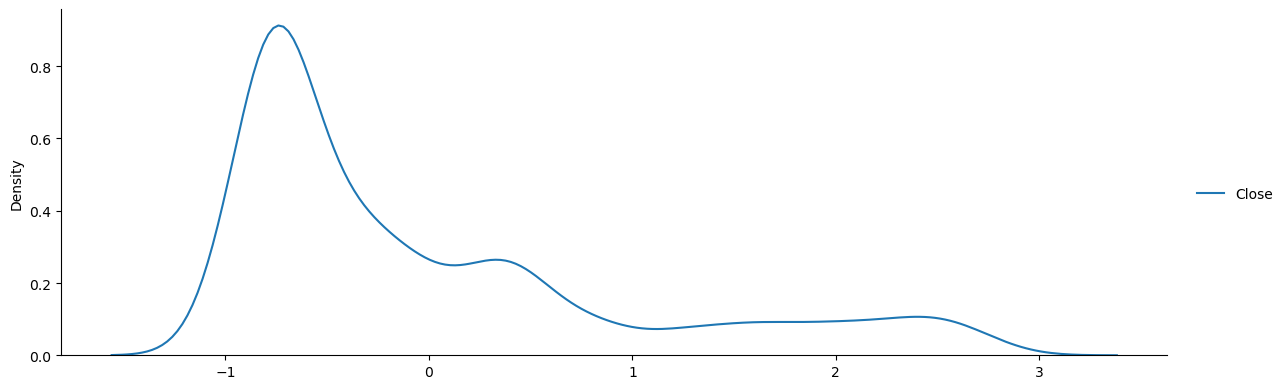

In [30]:
# Target Standardization
from sklearn.preprocessing import StandardScaler
standardizer_y = StandardScaler()
standardized_y = cleaned_data_Y.copy(deep=True)
standardized_y[:] = standardizer_y.fit_transform(standardized_y[:])
standardized_y = pd.DataFrame(standardized_y)
sns.displot(standardized_y, kind='kde', aspect=3, height=4)

---

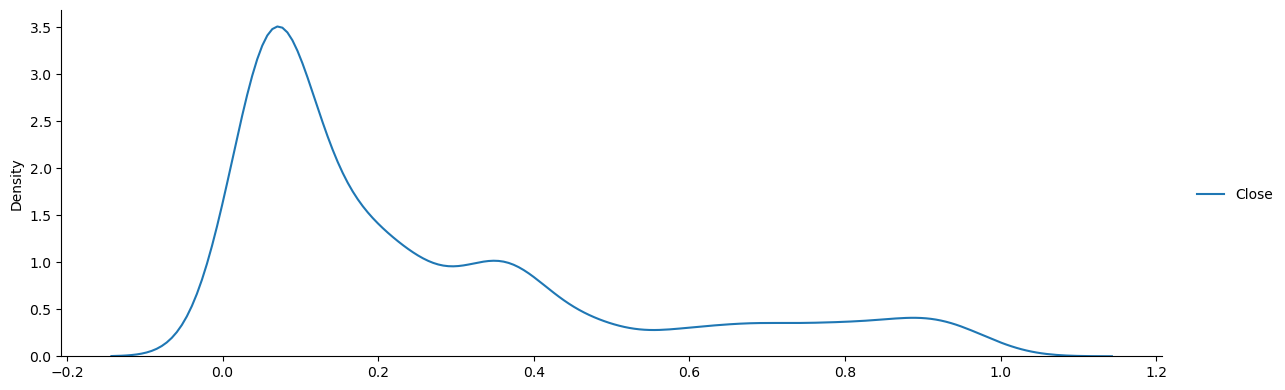

In [31]:
# Target Normalization
from sklearn.preprocessing import MinMaxScaler
normalizer_y = MinMaxScaler()
normalized_y = cleaned_data_Y.copy(deep=True)
normalized_y[normalized_y.columns[:]] = normalizer_y.fit_transform(normalized_y[:])
normalized_y = pd.DataFrame(normalized_y)
sns.displot(normalized_y, kind='kde', aspect=3, height=4)

---

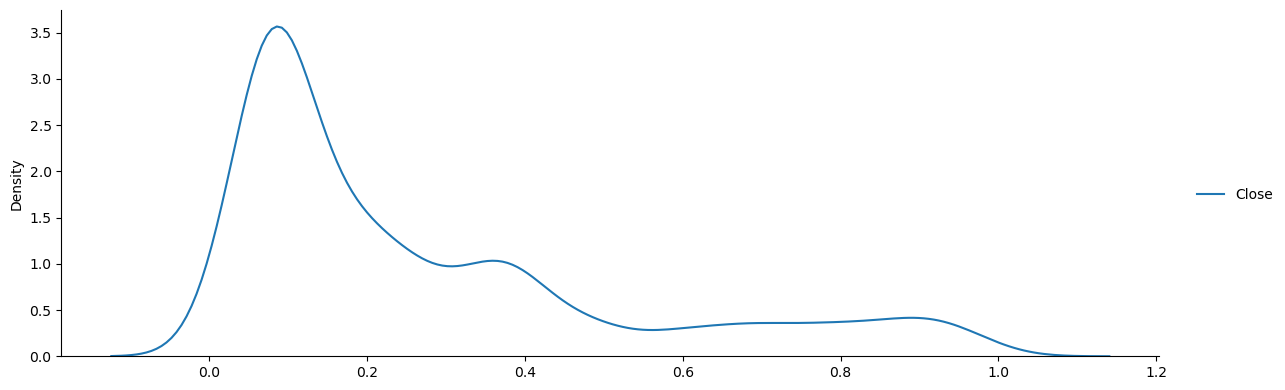

In [32]:
# Target Maximum Absolute Scaling
from sklearn.preprocessing import MaxAbsScaler
max_abs_scaler_y = MaxAbsScaler()
max_abs_scaled_y = cleaned_data_Y.copy(deep=True)
max_abs_scaled_y[max_abs_scaled_y.columns[:]] = max_abs_scaler_y.fit_transform(max_abs_scaled_y[:])
max_abs_scaled_y = pd.DataFrame(max_abs_scaled_y)
sns.displot(max_abs_scaled_y, kind='kde', aspect=3, height=4)

---

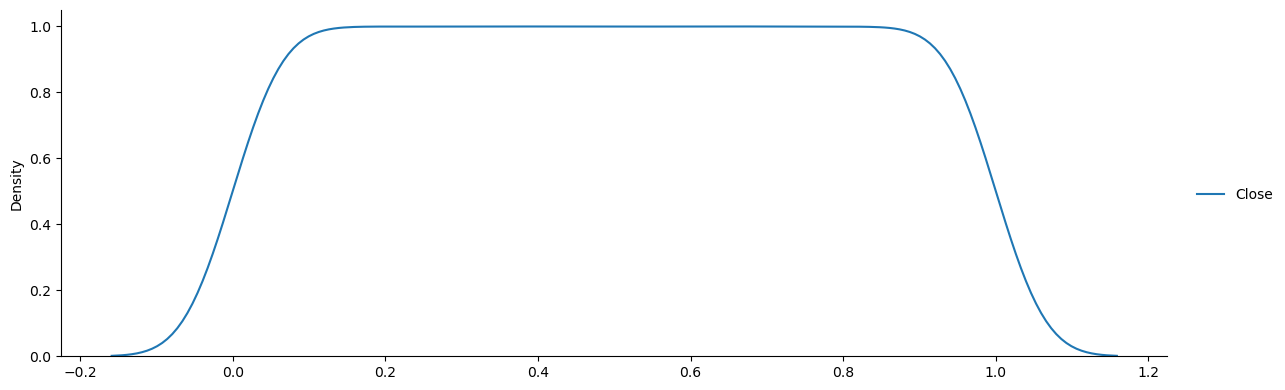

In [33]:
# Target Quantile Transformer Scaling
from sklearn.preprocessing import QuantileTransformer
quantile_transformer_y = QuantileTransformer()
quantile_transformed_y = cleaned_data_Y.copy(deep=True)
quantile_transformed_y[quantile_transformed_y.columns[:]] = quantile_transformer_y.fit_transform(quantile_transformed_y[:])
quantile_transformed_y = pd.DataFrame(quantile_transformed_y)
sns.displot(quantile_transformed_y, kind='kde', aspect=3, height=4)

---

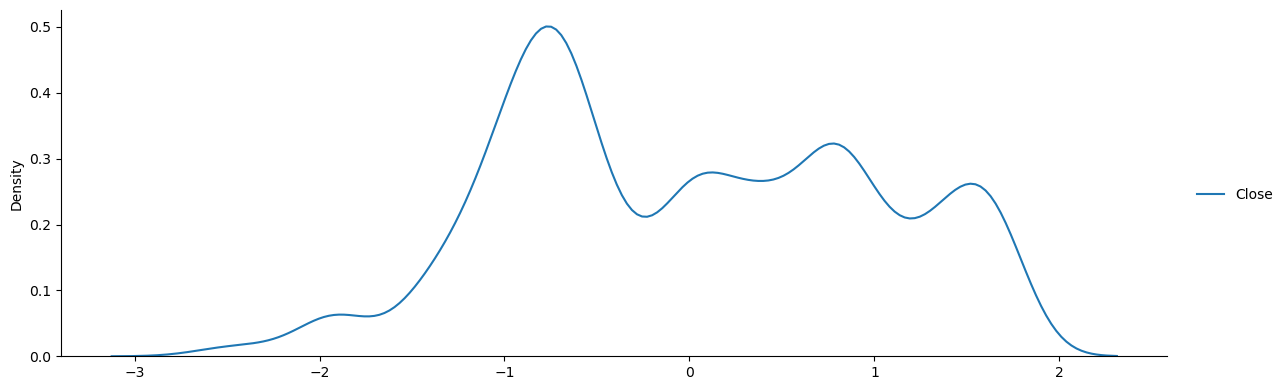

In [34]:
# Target Power Transformer Scaling (with Yeo-Johnson Transform)
from sklearn.preprocessing import power_transform
powered_y = cleaned_data_Y.copy(deep=True)
powered_y[powered_y.columns[:]] = power_transform(powered_y, method='yeo-johnson')
powered_y = pd.DataFrame(powered_y)
sns.displot(powered_y, kind='kde', aspect=3, height=4)

In the target scaling, Normalization and Maximum Absolute Scaling results are the same results and has the same shape with the Standardization. However, Normalizaton(or Maximum Absolute Scaling) has better range than Standardization. hus, Normalization Scaling will be used in the model predictions for the target.

---

<a id='storing_section'></a>
## 4. Storing The Data

The data that is applied feature engineering method is stored in this section.

In [43]:
# If predictors and/or target are scaleed, then choose the proper scaling algoritmh before storing
transformed_data = pd.DataFrame()
transformed_data['Date'] = cleaned_data.Date
transformed_data[normalized.columns] = normalized
transformed_data[normalized_y.columns] = normalized_y

In [44]:
transformed_data.head()

,Date,Open,High,Low,Adj_Close,Volume,Close
0,2004-08-19,0.000135,0.000386,0.000000,0.000055,0.543577,0.000055
1,2004-08-20,0.000303,0.001222,0.000767,0.001395,0.277886,0.001395
2,2004-08-23,0.001927,0.001955,0.002210,0.001578,0.222151,0.001578
3,2004-08-24,0.002009,0.001642,0.001285,0.000817,0.185523,0.000817
4,2004-08-25,0.000962,0.001042,0.001337,0.001007,0.111765,0.001007


In [45]:
transformed_data.shape

(4856, 7)

In [42]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4856 entries, 0 to 4855
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4856 non-null   object 
 1   Open       4856 non-null   float64
 2   High       4856 non-null   float64
 3   Low        4856 non-null   float64
 4   Adj_Close  4856 non-null   float64
 5   Volume     4856 non-null   float64
 6   Close      4856 non-null   float64
dtypes: float64(6), object(1)
memory usage: 265.7+ KB


In [46]:
# Stroing the transformed data
transformed_data.to_csv('SCALED_Google_Stock_Price_Dataset.csv', index=False)

---